In [272]:
import numpy as np
import pandas as pd
from plotnine import *
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import re 
data = pd.read_csv('data.csv')
data_genre = pd.read_csv('data_by_genres.csv')
data_genre.head()

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.166667,5,1
1,[],0.679245,0.521473,2.298526e+05,0.401522,0.196737,0.221586,-12.679076,0.112267,112.025168,0.515920,21.682005,7,1
2,a cappella,0.621532,0.577017,1.936522e+05,0.345694,0.003799,0.127087,-12.770211,0.095324,111.813230,0.453186,43.351819,11,1
3,abstract,0.359395,0.459500,3.430185e+05,0.487000,0.791400,0.119480,-14.092000,0.043420,124.743200,0.304990,41.500000,1,1
4,abstract beats,0.353347,0.694400,2.338244e+05,0.613400,0.349403,0.102453,-6.699800,0.143453,119.398400,0.634187,58.600000,10,0


In [273]:
plt.figure(figsize=(16, 10))
list_genre = data_genre['genres'].to_list() #find the top 10 genres
listToStr = ' '.join([str(elem) for elem in list_genre]) 
wordlist = listToStr.split()
frequency = {}
for item in wordlist:
   if (item in frequency):
      frequency[item] += 1
   else:
      frequency[item] = 1
top_10_genres = sorted(frequency, key = frequency.get, reverse = True)[:11] #11 because hip hop is one word
top_10_genres

['pop',
 'indie',
 'rock',
 'metal',
 'jazz',
 'hop',
 'hip',
 'folk',
 'classical',
 'punk',
 'deep']

<Figure size 1152x720 with 0 Axes>

In [274]:
data_top10_genre = data_genre[data_genre['genres'].str.match('.*(pop).*|.*(indie).*|.*(rock).*|.*(metal).*|.*(jazz).*|.*(hip hop).*|.*(folk).*|.*(classical).*|.*(punk).*|.*(deep).*') == True]
data_top10_genre = data_top10_genre.reset_index()
data_top10_genre.head()

,index,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,5,abstract hip hop,0.205872,0.723132,249095.103216,0.645461,0.002853,0.168032,-7.216007,0.250104,112.160287,0.584392,43.804971,11,1
1,9,acid jazz,0.155414,0.714200,284362.366667,0.694667,0.190613,0.106800,-10.234667,0.052020,112.243400,0.789367,44.033333,6,1
2,10,acid rock,0.258027,0.453541,252930.717351,0.592055,0.159560,0.235854,-11.124684,0.072292,125.465937,0.535975,34.500012,9,1
3,14,acoustic pop,0.485250,0.527821,234521.889438,0.482990,0.047114,0.153361,-9.214583,0.040122,117.555965,0.384601,52.866982,11,1
4,15,acoustic punk,0.374439,0.527967,192338.424286,0.614436,0.068067,0.180224,-8.175711,0.067979,120.960554,0.740857,38.998571,9,1


In [275]:
data_top10_genre['genres'] = data_top10_genre['genres'].str.replace('.*(pop).*','pop')
data_top10_genre['genres'] = data_top10_genre['genres'].str.replace('.*(indie).*','indie')
data_top10_genre['genres'] = data_top10_genre['genres'].str.replace('.*(metal).*','metal')
data_top10_genre['genres'] = data_top10_genre['genres'].str.replace('.*(jazz).*','jazz')
data_top10_genre['genres'] = data_top10_genre['genres'].str.replace('.*(hip hop).*','hip hop')
data_top10_genre['genres'] = data_top10_genre['genres'].str.replace('.*(folk).*','folk')
data_top10_genre['genres'] = data_top10_genre['genres'].str.replace('.*(classical).*','classical')
data_top10_genre['genres'] = data_top10_genre['genres'].str.replace('.*(punk).*','punk')
data_top10_genre['genres'] = data_top10_genre['genres'].str.replace('.*(rock).*','rock')
data_top10_genre['genres'] = data_top10_genre['genres'].str.replace('.*(deep).*','deep')
data_top10_genre.head()

,index,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,5,hip hop,0.205872,0.723132,249095.103216,0.645461,0.002853,0.168032,-7.216007,0.250104,112.160287,0.584392,43.804971,11,1
1,9,jazz,0.155414,0.714200,284362.366667,0.694667,0.190613,0.106800,-10.234667,0.052020,112.243400,0.789367,44.033333,6,1
2,10,rock,0.258027,0.453541,252930.717351,0.592055,0.159560,0.235854,-11.124684,0.072292,125.465937,0.535975,34.500012,9,1
3,14,pop,0.485250,0.527821,234521.889438,0.482990,0.047114,0.153361,-9.214583,0.040122,117.555965,0.384601,52.866982,11,1
4,15,punk,0.374439,0.527967,192338.424286,0.614436,0.068067,0.180224,-8.175711,0.067979,120.960554,0.740857,38.998571,9,1


In [276]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
features = ['acousticness', 'danceability', 'duration_ms','energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence','key']
x = data_top10_genre.loc[:,features].values
x = StandardScaler().fit_transform(x)
pd.DataFrame(data = x, columns = features).head()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,key
0,-0.466482,1.458171,0.004352,0.188171,-0.729585,-0.318936,0.501946,2.897490,-0.479003,0.519652,1.460950
1,-0.636655,1.392460,0.534460,0.411614,0.059688,-1.066630,-0.158942,-0.414031,-0.474273,1.641213,-0.040680
2,-0.290586,-0.525247,0.062006,-0.054341,-0.070848,0.509232,-0.353797,-0.075124,0.278218,0.254728,0.860298
3,0.475739,0.021240,-0.214700,-0.549603,-0.543528,-0.498084,0.064389,-0.612941,-0.171936,-0.573543,1.460950
4,0.102022,0.022316,-0.848765,0.047287,-0.455451,-0.170052,0.291834,-0.147226,0.021818,1.375783,0.860298


In [277]:
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf.head()

,principal component 1,principal component 2
0,-1.749604,-1.254389
1,-0.778325,-1.237117
2,-0.010994,0.426271
3,0.448241,-0.231050
4,-0.829969,-0.966261


In [278]:
final_df = data_top10_genre.merge(principalDf, left_index = True, right_index = True)
final = final_df.loc[:,['genres', 'principal component 1', 'principal component 2']]
final.head()

,genres,principal component 1,principal component 2
0,hip hop,-1.749604,-1.254389
1,jazz,-0.778325,-1.237117
2,rock,-0.010994,0.426271
3,pop,0.448241,-0.231050
4,punk,-0.829969,-0.966261


In [279]:
final

,genres,principal component 1,principal component 2
0,hip hop,-1.749604,-1.254389
1,jazz,-0.778325,-1.237117
2,rock,-0.010994,0.426271
3,pop,0.448241,-0.231050
4,punk,-0.829969,-0.966261
...,...,...,...
1191,indie,-2.569616,0.751196
1192,rock,-0.168748,-1.017097
1193,folk,2.708513,-1.040620
1194,indie,0.270321,-0.270748


<Figure size 1152x720 with 0 Axes>

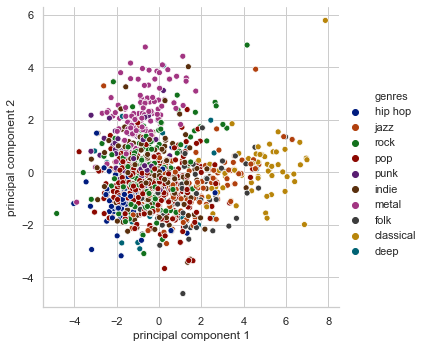

In [280]:
plt.figure(figsize=(16, 10))
sns.set(style= "whitegrid")
sns.set_context("notebook")
ax = sns.relplot(x = 'principal component 1', y = 'principal component 2', hue = 'genres', palette = "dark", data = final)